In [ ]:
import tarfile
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

# Path to the zip file in Google Drive
zip_path = '/content/drive/MyDrive/birds.zip'

# Temporary extraction directory in Colab
extract_path = '/content/birds'

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Extracted contents to {extract_path}")


Extracted contents to /content/birds


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import copy
import time
from tqdm import tqdm
import os


In [ ]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import DataLoader, sampler, random_split
import timm
from timm.loss import LabelSmoothingCrossEntropy
from timm.data import create_transform

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import numpy as np
from torchvision import models

In [ ]:
def get_classes(data_dir):
    all_data = datasets.ImageFolder(data_dir)
    return all_data.classes

In [ ]:
def get_data_loaders(data_dir, batch_size, train = False):
    if train:
        transform = transforms.Compose([
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomVerticalFlip(p=0.5),
            transforms.RandomApply(torch.nn.ModuleList([transforms.ColorJitter()]), p=0.1),
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
#             transforms.RandomErasing(p=0.25, value='random')
        ])
        all_data = datasets.ImageFolder(data_dir, transform=transform)
        train_data_len = int(len(all_data)*0.75)
        valid_data_len = int((len(all_data) - train_data_len)/2)
        test_data_len = int(len(all_data) - train_data_len - valid_data_len)
        train_data, val_data, test_data = random_split(all_data, [train_data_len, valid_data_len, test_data_len])
        train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4)
        return train_loader, train_data_len

    else:
        transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
        ])
        all_data = datasets.ImageFolder(data_dir, transform=transform)
        train_data_len = int(len(all_data)*0.70)
        valid_data_len = int((len(all_data) - train_data_len)/2)
        test_data_len = int(len(all_data) - train_data_len - valid_data_len)
        train_data, val_data, test_data = random_split(all_data, [train_data_len, valid_data_len, test_data_len])
        val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True, num_workers=4)
        test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=4)
        return (val_loader, test_loader, valid_data_len, test_data_len)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:

import tarfile
import os
zip_path='/content/birds/CUB_200_2011.tgz'
extract_path='/content/birds/CUB_200_2011_new'
with tarfile.open(zip_path, 'r:gz') as tar_ref:
    tar_ref.extractall(extract_path)
print("successfully extracted")

successfully extracted


In [ ]:
extract_path='/content/birds/CUB_200_2011_new'

In [ ]:
 # Check the extracted files
for root, dirs, files in os.walk(extract_path):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files[:5]}")  # Limit to first 5 files for readability
    break  # Remove this line to see the entire structure


Root: /content/birds/CUB_200_2011_new
Directories: ['CUB_200_2011']
Files: ['attributes.txt']


In [ ]:
dataset_path="/content/birds/CUB_200_2011_new/CUB_200_2011/images"

In [ ]:
(train_loader, train_data_len) = get_data_loaders(dataset_path, 256, train=True)
(val_loader, test_loader, valid_data_len, test_data_len) = get_data_loaders(dataset_path, 64, train=False)
classes = get_classes(dataset_path)

In [ ]:
print(classes)

['001.Black_footed_Albatross', '002.Laysan_Albatross', '003.Sooty_Albatross', '004.Groove_billed_Ani', '005.Crested_Auklet', '006.Least_Auklet', '007.Parakeet_Auklet', '008.Rhinoceros_Auklet', '009.Brewer_Blackbird', '010.Red_winged_Blackbird', '011.Rusty_Blackbird', '012.Yellow_headed_Blackbird', '013.Bobolink', '014.Indigo_Bunting', '015.Lazuli_Bunting', '016.Painted_Bunting', '017.Cardinal', '018.Spotted_Catbird', '019.Gray_Catbird', '020.Yellow_breasted_Chat', '021.Eastern_Towhee', '022.Chuck_will_Widow', '023.Brandt_Cormorant', '024.Red_faced_Cormorant', '025.Pelagic_Cormorant', '026.Bronzed_Cowbird', '027.Shiny_Cowbird', '028.Brown_Creeper', '029.American_Crow', '030.Fish_Crow', '031.Black_billed_Cuckoo', '032.Mangrove_Cuckoo', '033.Yellow_billed_Cuckoo', '034.Gray_crowned_Rosy_Finch', '035.Purple_Finch', '036.Northern_Flicker', '037.Acadian_Flycatcher', '038.Great_Crested_Flycatcher', '039.Least_Flycatcher', '040.Olive_sided_Flycatcher', '041.Scissor_tailed_Flycatcher', '042.Ver

In [ ]:
dataloaders = {
    "train":train_loader,
    "val": val_loader
}
dataset_sizes = {
    "train":train_data_len,
    "val": valid_data_len
}

In [ ]:
print(len(train_loader))
print(len(val_loader))
print(len(test_loader))

35
28
28


In [ ]:
print(train_data_len, test_data_len, valid_data_len)

8841 1769 1768


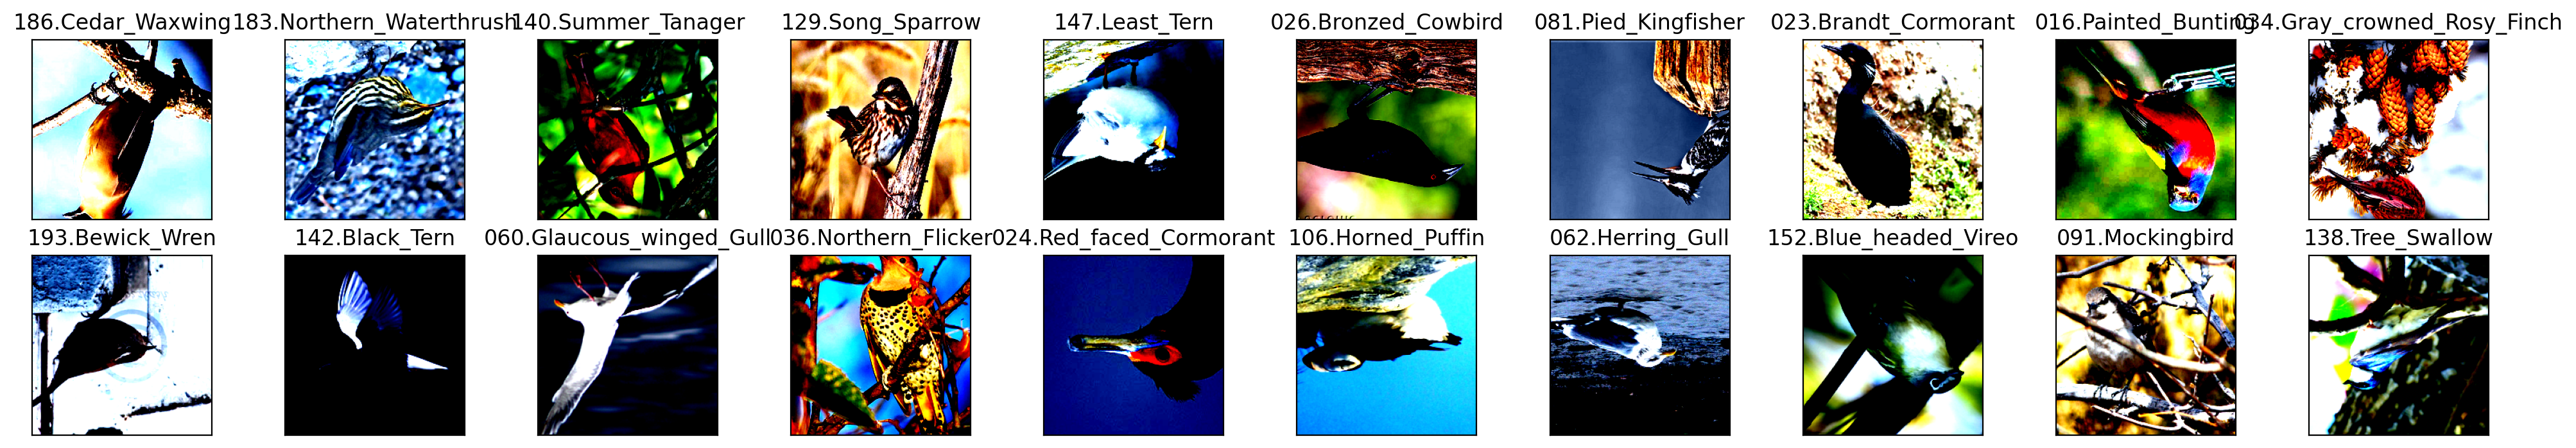

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.__next__()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

In [ ]:
#CUDA (Compute Unified Device Architecture) is a parallel computing platform and application programming interface (API) created by NVIDIA.
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
torch.backends.cudnn.benchmark = True

model = torchvision.models.efficientnet_b2(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

# EfficientNet Model
n_inputs = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Linear(n_inputs, 2048),  # Increase the size of the first fully connected layer
    nn.SiLU(),
    nn.Dropout(0.3),
    nn.Linear(2048, 2048),  # Add another fully connected layer
#     nn.SiLU(),
#     nn.Dropout(0.3),
#     nn.Linear(2048, 2048),  # Add another fully connected layer
    nn.SiLU(),
    nn.Dropout(0.3),
    nn.Linear(2048, len(classes))  # Adjust the output size to match the number of classes
)

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


Downloading: "https://download.pytorch.org/models/efficientnet_b2_rwightman-c35c1473.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b2_rwightman-c35c1473.pth
100%|██████████| 35.2M/35.2M [00:00<00:00, 62.2MB/s]


In [ ]:
print(f"Trainable Params: {count_parameters(model)}")

Trainable Params: 7491784


In [ ]:
print(model)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
criterion = nn.CrossEntropyLoss(label_smoothing=0.2)
criterion = criterion.to(device)

# optimizer = optim.AdamW(model.fc.parameters(), lr=0.001)
optimizer = optim.AdamW(model.classifier.parameters(), lr=0.001)
# optimizer = optim.SGD(model.classifier.parameters(), lr=0.01, momentum=0.9, nesterov=True)

In [ ]:
step_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.96)

In [ ]:
training_history = {'accuracy':[],'loss':[]}
validation_history = {'accuracy':[],'loss':[]}

In [ ]:
import os

checkpoint_dir = 'checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

#             if phase == 'train':
#                 training_history['accuracy'].append(epoch_acc.cpu())  # Append epoch_acc after moving to CPU
#                 training_history['loss'].append(epoch_loss)
#             elif phase == 'val':
#                 validation_history['accuracy'].append(epoch_acc.cpu())  # Append epoch_acc after moving to CPU
#                 validation_history['loss'].append(epoch_loss)
            if phase == 'train':
                training_history['accuracy'].append(torch.tensor(epoch_acc).cpu())  # Convert to tensor and move to CPU
                training_history['loss'].append(epoch_loss)
            elif phase == 'val':
                validation_history['accuracy'].append(torch.tensor(epoch_acc).cpu())  # Convert to tensor and move to CPU
                validation_history['loss'].append(epoch_loss)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        # Save checkpoint
        checkpoint_path = os.path.join(checkpoint_dir, 'checkpoint_epoch_{}.pt'.format(epoch))
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'best_acc': best_acc,
            'training_history': training_history,
            'validation_history': validation_history
        }, checkpoint_path)

        print("Checkpoint saved:", checkpoint_path)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
model_ft = train_model(model, criterion, optimizer, step_scheduler,
                       num_epochs=20)

Epoch 0/19
----------


100%|██████████| 35/35 [01:11<00:00,  2.05s/it]


train Loss: 4.5307 Acc: 0.1476


100%|██████████| 28/28 [00:10<00:00,  2.78it/s]


val Loss: 3.3913 Acc: 0.4531
Checkpoint saved: checkpoints/checkpoint_epoch_0.pt

Epoch 1/19
----------


100%|██████████| 35/35 [00:59<00:00,  1.70s/it]


train Loss: 3.4004 Acc: 0.4389


100%|██████████| 28/28 [00:13<00:00,  2.12it/s]


val Loss: 2.8861 Acc: 0.6092
Checkpoint saved: checkpoints/checkpoint_epoch_1.pt

Epoch 2/19
----------


100%|██████████| 35/35 [00:58<00:00,  1.68s/it]


train Loss: 3.0354 Acc: 0.5629


100%|██████████| 28/28 [00:12<00:00,  2.18it/s]


val Loss: 2.6452 Acc: 0.7053
Checkpoint saved: checkpoints/checkpoint_epoch_2.pt

Epoch 3/19
----------


100%|██████████| 35/35 [00:57<00:00,  1.65s/it]


train Loss: 2.8345 Acc: 0.6305


100%|██████████| 28/28 [00:09<00:00,  2.96it/s]


val Loss: 2.5223 Acc: 0.7410
Checkpoint saved: checkpoints/checkpoint_epoch_3.pt

Epoch 4/19
----------


100%|██████████| 35/35 [01:03<00:00,  1.83s/it]


train Loss: 2.6638 Acc: 0.6913


100%|██████████| 28/28 [00:13<00:00,  2.13it/s]


val Loss: 2.4196 Acc: 0.7919
Checkpoint saved: checkpoints/checkpoint_epoch_4.pt

Epoch 5/19
----------


100%|██████████| 35/35 [00:59<00:00,  1.69s/it]


train Loss: 2.5645 Acc: 0.7310


100%|██████████| 28/28 [00:12<00:00,  2.33it/s]


val Loss: 2.3507 Acc: 0.8071
Checkpoint saved: checkpoints/checkpoint_epoch_5.pt

Epoch 6/19
----------


100%|██████████| 35/35 [00:59<00:00,  1.70s/it]


train Loss: 2.4683 Acc: 0.7729


100%|██████████| 28/28 [00:10<00:00,  2.61it/s]


val Loss: 2.2695 Acc: 0.8507
Checkpoint saved: checkpoints/checkpoint_epoch_6.pt

Epoch 7/19
----------


100%|██████████| 35/35 [01:07<00:00,  1.92s/it]


train Loss: 2.3736 Acc: 0.8048


100%|██████████| 28/28 [00:09<00:00,  2.85it/s]


val Loss: 2.2352 Acc: 0.8484
Checkpoint saved: checkpoints/checkpoint_epoch_7.pt

Epoch 8/19
----------


100%|██████████| 35/35 [00:59<00:00,  1.69s/it]


train Loss: 2.3108 Acc: 0.8237


100%|██████████| 28/28 [00:12<00:00,  2.20it/s]


val Loss: 2.1958 Acc: 0.8688
Checkpoint saved: checkpoints/checkpoint_epoch_8.pt

Epoch 9/19
----------


100%|██████████| 35/35 [01:00<00:00,  1.74s/it]


train Loss: 2.2466 Acc: 0.8474


100%|██████████| 28/28 [00:13<00:00,  2.06it/s]


val Loss: 2.1562 Acc: 0.8761
Checkpoint saved: checkpoints/checkpoint_epoch_9.pt

Epoch 10/19
----------


100%|██████████| 35/35 [01:01<00:00,  1.75s/it]


train Loss: 2.1927 Acc: 0.8734


100%|██████████| 28/28 [00:09<00:00,  2.90it/s]


val Loss: 2.1416 Acc: 0.8761
Checkpoint saved: checkpoints/checkpoint_epoch_10.pt

Epoch 11/19
----------


100%|██████████| 35/35 [01:00<00:00,  1.72s/it]


train Loss: 2.1539 Acc: 0.8884


100%|██████████| 28/28 [00:13<00:00,  2.03it/s]


val Loss: 2.1143 Acc: 0.8835
Checkpoint saved: checkpoints/checkpoint_epoch_11.pt

Epoch 12/19
----------


100%|██████████| 35/35 [00:59<00:00,  1.69s/it]


train Loss: 2.1099 Acc: 0.9001


100%|██████████| 28/28 [00:11<00:00,  2.50it/s]


val Loss: 2.1056 Acc: 0.8857
Checkpoint saved: checkpoints/checkpoint_epoch_12.pt

Epoch 13/19
----------


100%|██████████| 35/35 [00:59<00:00,  1.69s/it]


train Loss: 2.0732 Acc: 0.9186


100%|██████████| 28/28 [00:09<00:00,  2.93it/s]


val Loss: 2.0753 Acc: 0.8897
Checkpoint saved: checkpoints/checkpoint_epoch_13.pt

Epoch 14/19
----------


100%|██████████| 35/35 [01:03<00:00,  1.82s/it]


train Loss: 2.0547 Acc: 0.9198


100%|██████████| 28/28 [00:13<00:00,  2.09it/s]


val Loss: 2.0594 Acc: 0.9021
Checkpoint saved: checkpoints/checkpoint_epoch_14.pt

Epoch 15/19
----------


100%|██████████| 35/35 [00:59<00:00,  1.70s/it]


train Loss: 2.0233 Acc: 0.9332


100%|██████████| 28/28 [00:12<00:00,  2.16it/s]


val Loss: 2.0456 Acc: 0.8993
Checkpoint saved: checkpoints/checkpoint_epoch_15.pt

Epoch 16/19
----------


100%|██████████| 35/35 [00:58<00:00,  1.68s/it]


train Loss: 2.0063 Acc: 0.9330


100%|██████████| 28/28 [00:09<00:00,  2.86it/s]


val Loss: 2.0281 Acc: 0.9038
Checkpoint saved: checkpoints/checkpoint_epoch_16.pt

Epoch 17/19
----------


100%|██████████| 35/35 [01:05<00:00,  1.87s/it]


train Loss: 1.9811 Acc: 0.9430


100%|██████████| 28/28 [00:09<00:00,  2.95it/s]


val Loss: 2.0177 Acc: 0.9038
Checkpoint saved: checkpoints/checkpoint_epoch_17.pt

Epoch 18/19
----------


100%|██████████| 35/35 [01:01<00:00,  1.75s/it]


train Loss: 1.9625 Acc: 0.9486


100%|██████████| 28/28 [00:12<00:00,  2.16it/s]


val Loss: 2.0198 Acc: 0.9038
Checkpoint saved: checkpoints/checkpoint_epoch_18.pt

Epoch 19/19
----------


100%|██████████| 35/35 [00:59<00:00,  1.70s/it]


train Loss: 1.9507 Acc: 0.9557


100%|██████████| 28/28 [00:13<00:00,  2.08it/s]


val Loss: 2.0120 Acc: 0.9084
Checkpoint saved: checkpoints/checkpoint_epoch_19.pt

Training complete in 24m 27s
Best val Acc: 0.908371


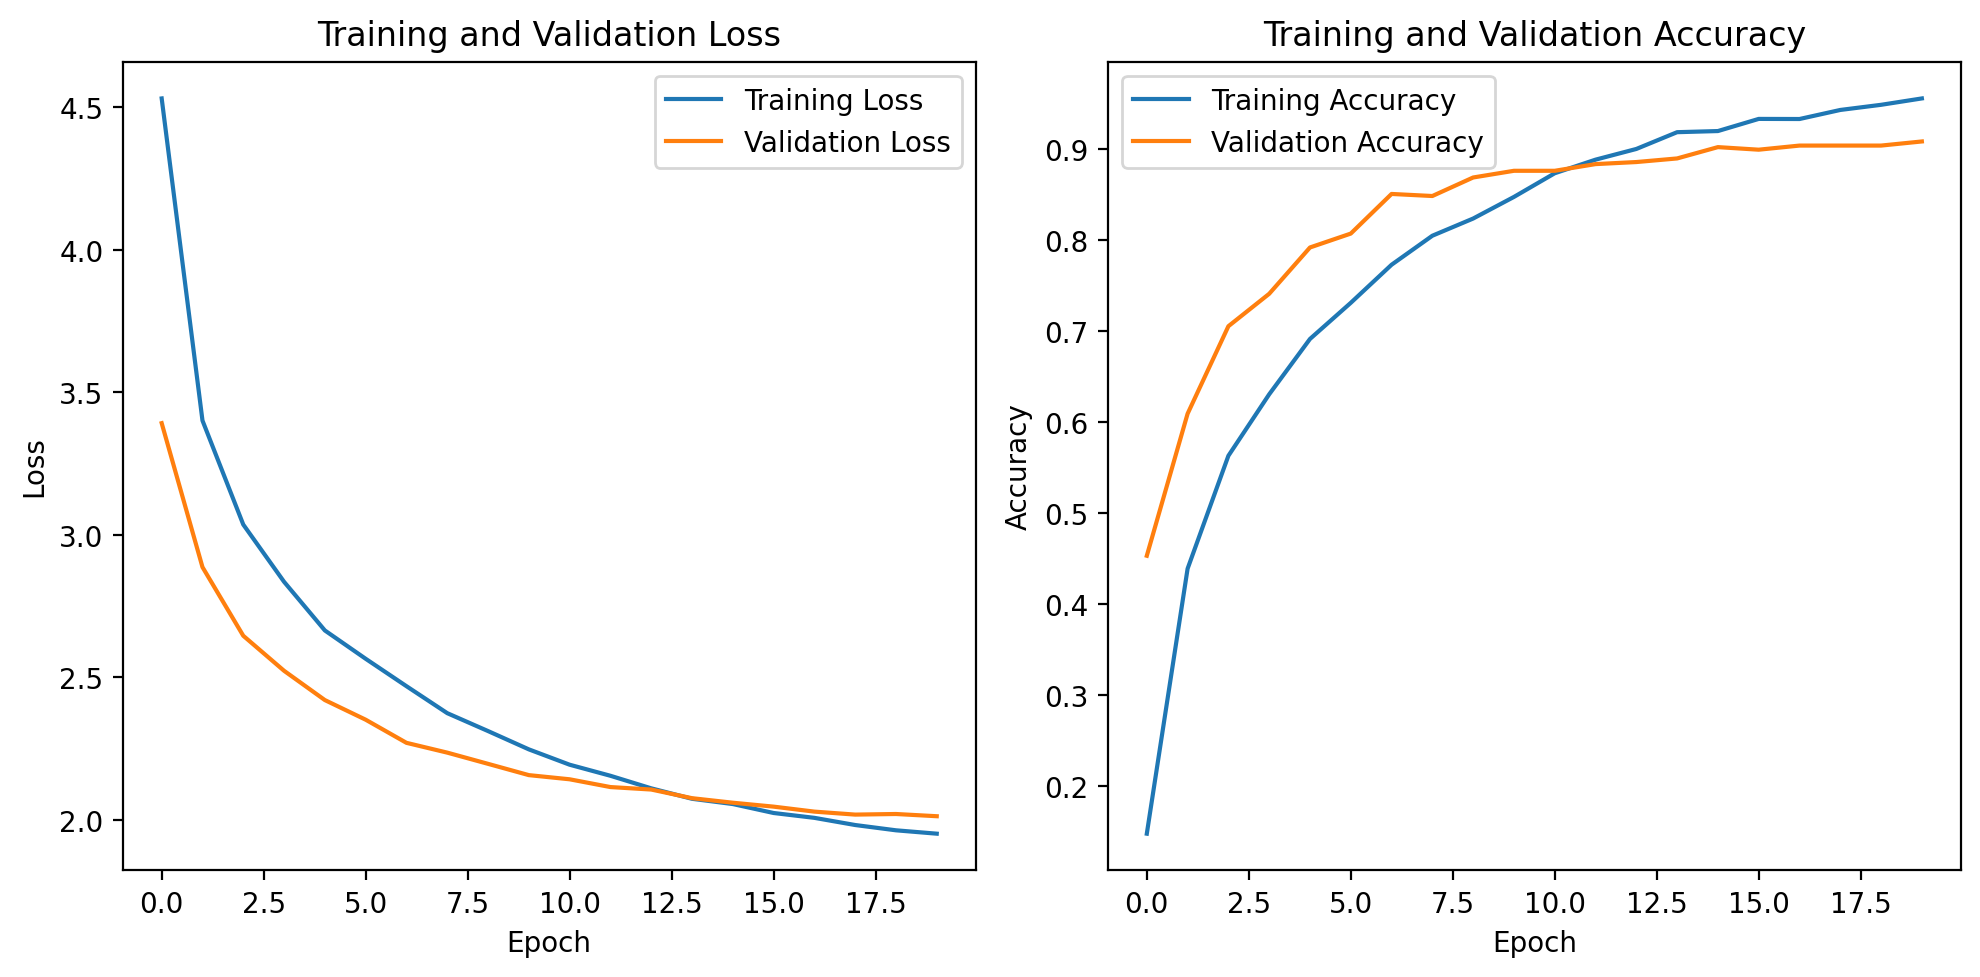

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_training_history(training_history, validation_history):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(training_history['loss'], label='Training Loss')
    plt.plot(validation_history['loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(np.array(training_history['accuracy']), label='Training Accuracy')
    plt.plot(np.array(validation_history['accuracy']), label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot training history
plot_training_history(training_history, validation_history)


In [ ]:
torch.cuda.empty_cache()

In [ ]:
%%time
test_loss = 0.0
class_correct = list(0. for i in range(len(classes)))
class_total = list(0. for i in range(len(classes)))

model_ft.eval()

for data, target in tqdm(test_loader):
    if torch.cuda.is_available():
        data, target = data.cuda(), target.cuda()
    with torch.no_grad():
        output = model_ft(data)
        loss = criterion(output, target)
    test_loss += loss.item()*data.size(0)
    _, pred = torch.max(output, 1)
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not torch.cuda.is_available() else np.squeeze(correct_tensor.cpu().numpy())
    if len(target) == 64:
        for i in range(64):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(len(classes)):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

100%|██████████| 28/28 [00:10<00:00,  2.71it/s]

Test Loss: 2.006717

Test Accuracy of 001.Black_footed_Albatross: 90% ( 9/10)
Test Accuracy of 002.Laysan_Albatross: 90% (10/11)
Test Accuracy of 003.Sooty_Albatross: 73% (11/15)
Test Accuracy of 004.Groove_billed_Ani: N/A (no training examples)
Test Accuracy of 005.Crested_Auklet: 100% ( 5/ 5)
Test Accuracy of 006.Least_Auklet: 100% ( 5/ 5)
Test Accuracy of 007.Parakeet_Auklet: 100% ( 9/ 9)
Test Accuracy of 008.Rhinoceros_Auklet: 87% ( 7/ 8)
Test Accuracy of 009.Brewer_Blackbird: 100% ( 9/ 9)
Test Accuracy of 010.Red_winged_Blackbird: 87% ( 7/ 8)
Test Accuracy of 011.Rusty_Blackbird: 90% (10/11)
Test Accuracy of 012.Yellow_headed_Blackbird: 100% ( 9/ 9)
Test Accuracy of 013.Bobolink: 83% ( 5/ 6)
Test Accuracy of 014.Indigo_Bunting: 80% ( 4/ 5)
Test Accuracy of 015.Lazuli_Bunting: 83% ( 5/ 6)
Test Accuracy of 016.Painted_Bunting: 100% ( 8/ 8)
Test Accuracy of 017.Cardinal: 85% ( 6/ 7)
Test Accuracy of 018.Spotted_Catbird: 87% ( 7/ 8)
Test Accuracy of 019.Gray_Catbird: 90% ( 9/10)
Test 

In [ ]:
from PIL import Image
from io import BytesIO
import requests

In [ ]:
def apply_test_transforms(inp):
    inp = inp.convert("RGB")

    out = transforms.functional.resize(inp, [224,224])
    out = transforms.functional.to_tensor(out)
    out = transforms.functional.normalize(out, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    return out

In [ ]:
def predict(model, filepath, show_img=False, url=False):
    if url:
        response = requests.get(filepath)
        im = Image.open(BytesIO(response.content))
    else:
         im = Image.open(filepath)
    if show_img:
        plt.imshow(im)
    im_as_tensor = apply_test_transforms(im)
    minibatch = torch.stack([im_as_tensor])
    if torch.cuda.is_available():
        minibatch = minibatch.cuda()
    pred = model(minibatch)
    _, classnum = torch.max(pred, 1)
    print(classnum)
    return classes[classnum]

In [ ]:
def formatText(string):
    string = string[4:]
    string = string.replace("_", " ")
    return string

tensor([79], device='cuda:0')


'Green Kingfisher'

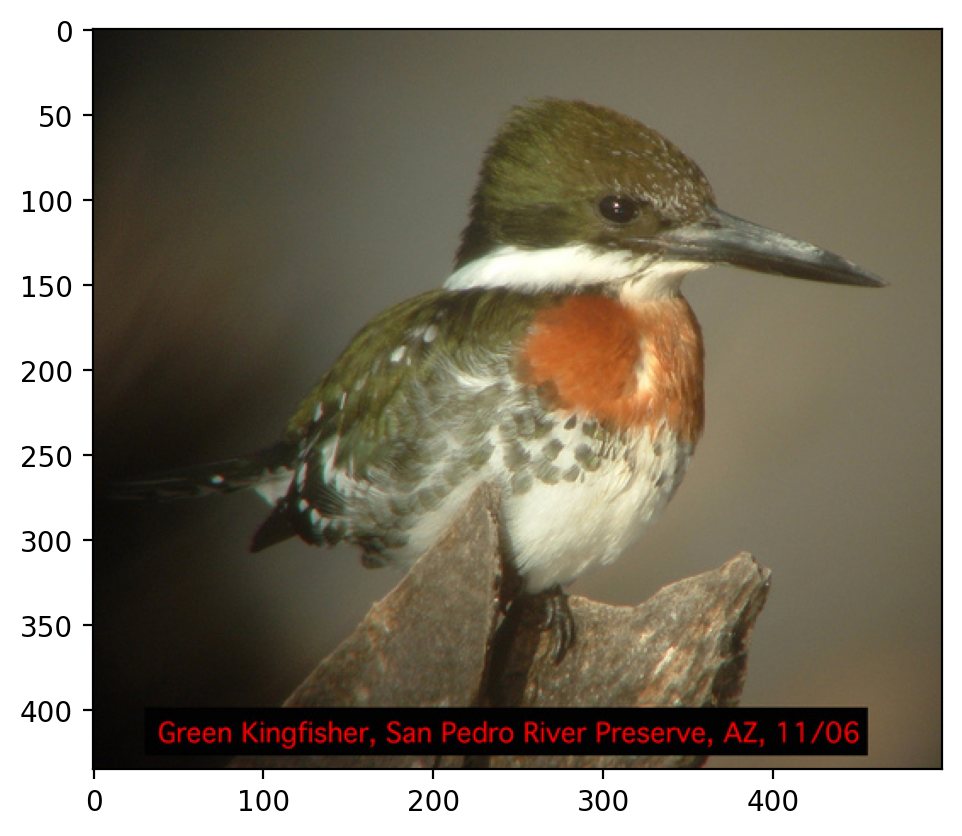

In [ ]:
formatText(predict(model_ft, "/content/birds/CUB_200_2011_new/CUB_200_2011/images/080.Green_Kingfisher/Green_Kingfisher_0027_71048.jpg", show_img=True))

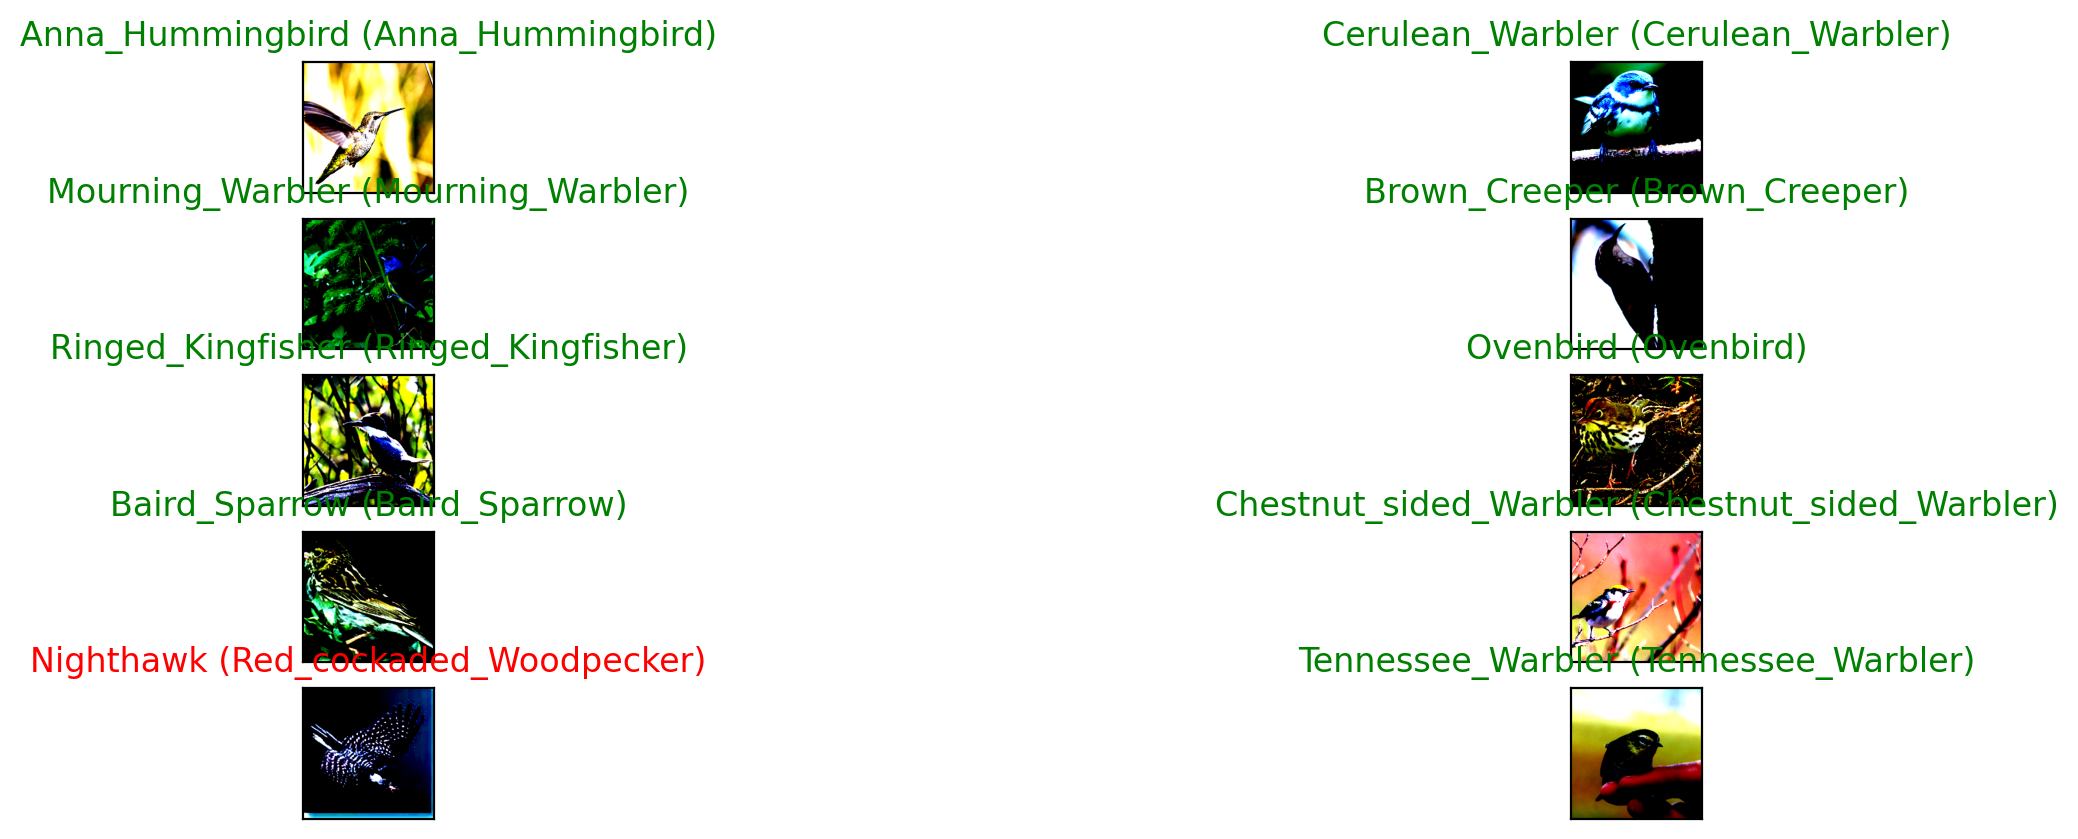

In [ ]:
dataiter = iter(test_loader)
images, labels = dataiter.__next__()
images.numpy()

# move model inputs to cuda, if GPU available
if torch.cuda.is_available():
    images = images.cuda()

# get sample outputs
output = model_ft(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not torch.cuda.is_available() else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(15, 10))
for idx in np.arange(10):
    ax = fig.add_subplot(10, 2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx].cpu(), (1, 2, 0)))
    ax.set_title("{} ({})".format(formatText(classes[preds[idx]]), formatText(classes[labels[idx]])),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))

tensor([89], device='cuda:0')


'Red breasted Merganser'

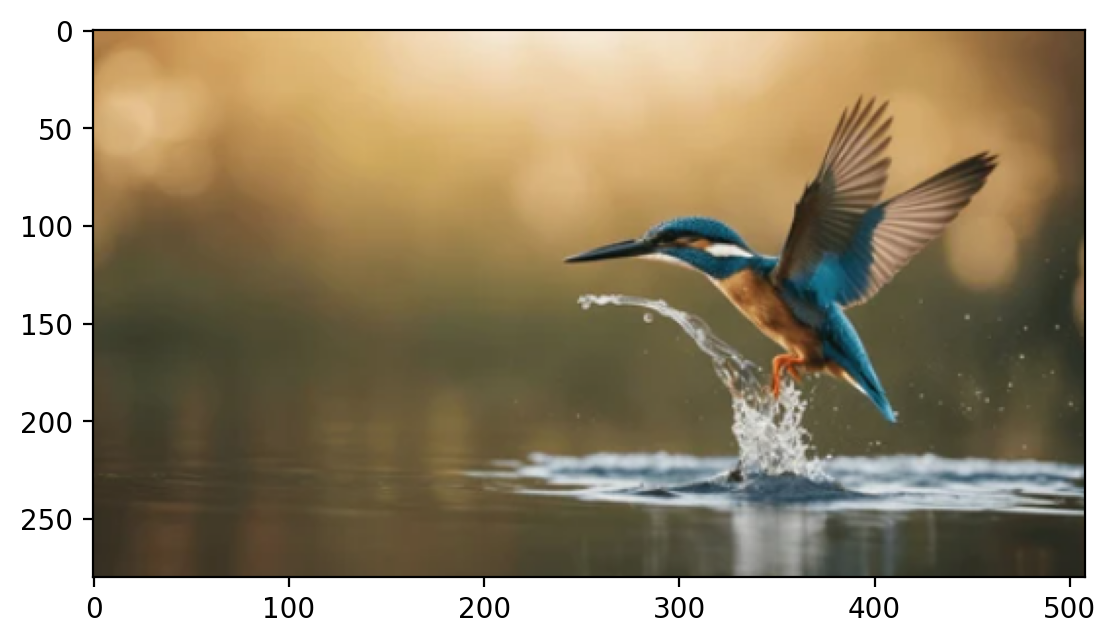

In [ ]:
formatText(predict(model_ft, r"/content/kingfisher.png", show_img=True))

tensor([81], device='cuda:0')


'Ringed Kingfisher'

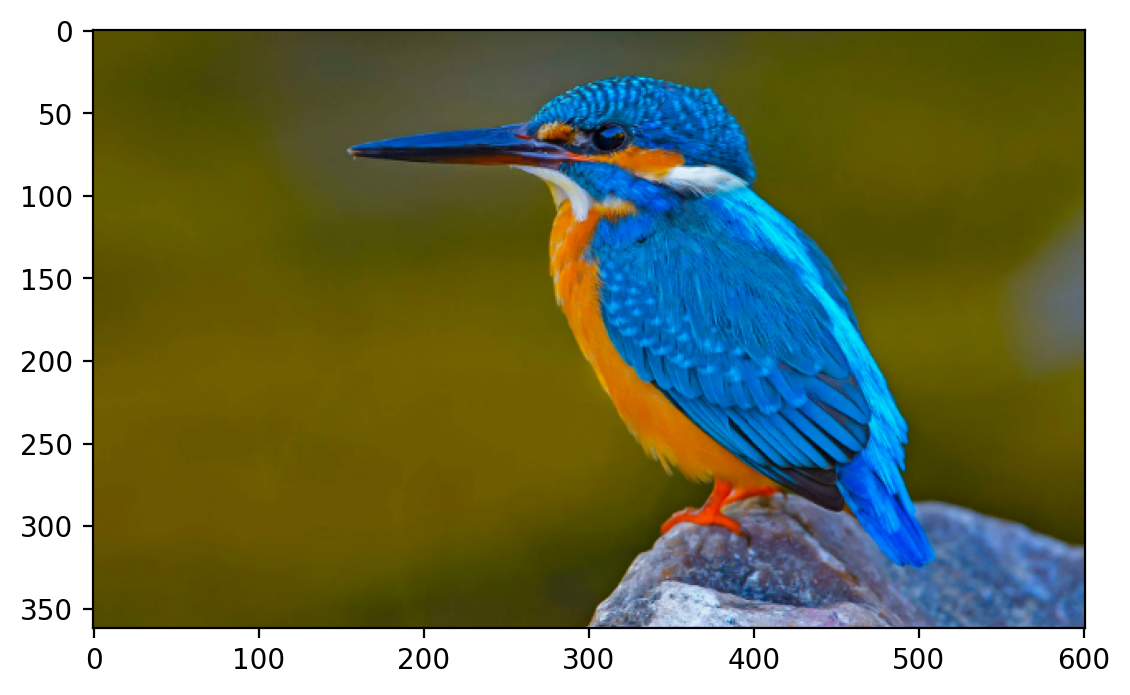

In [ ]:
formatText(predict(model_ft, r"/content/kf.png", show_img=True))

tensor([106], device='cuda:0')


'Common Raven'

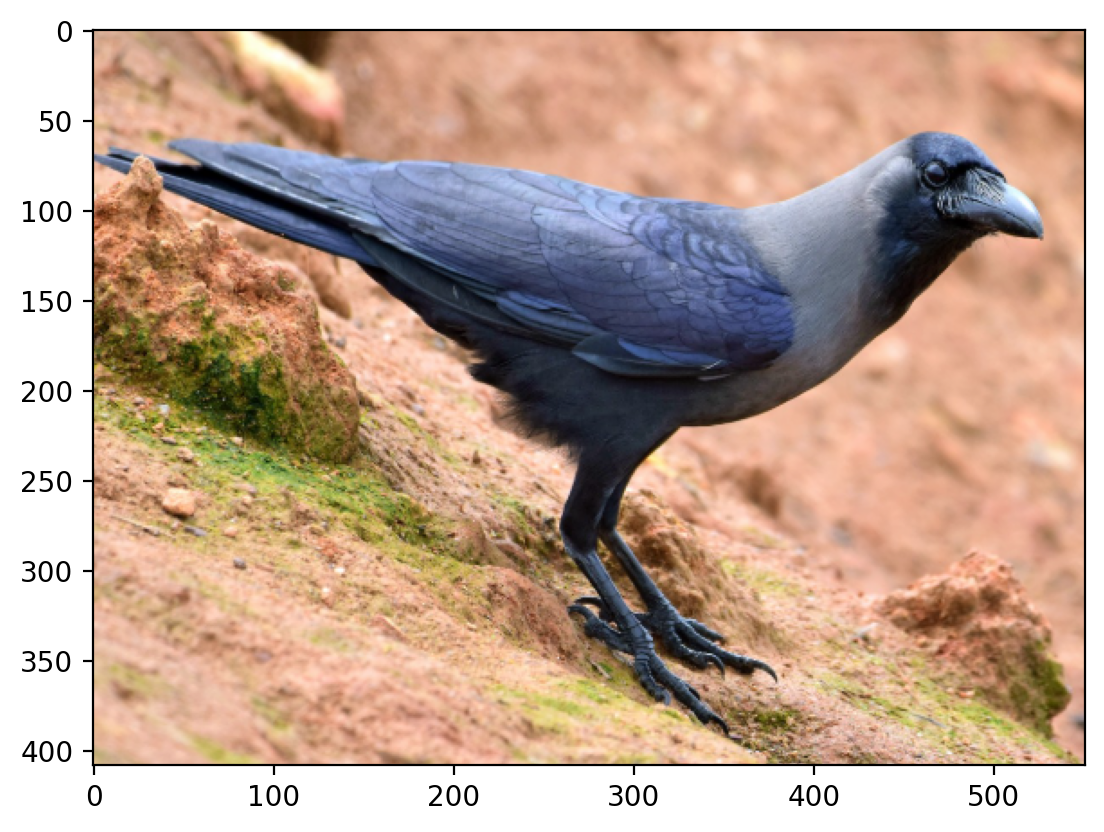

In [ ]:
formatText(predict(model_ft, r"/content/crow.png", show_img=True))

In [ ]:
import torch

# Assuming `model` is your trained model
model_path = "birds_streamlit.pth"
torch.save(model.state_dict(), model_path)
print(f"Model saved at {model_path}")


Model saved at birds_streamlit.pth
